In [1]:
import clean_and_add as cld
import pandas as pd
import matplotlib.pyplot as plt
import calplot

# Data import

In [11]:
names=['time','Ib','Ig','to','RH','WS','WD','P','Eg']
tmx_preANN=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/Temixco_2018_incomplete_maxmin_error_s15Nov.csv',index_col=0,parse_dates=True,names=names,skiprows=1)
tmx_preANN

,Ib,Ig,to,RH,WS,WD,P,Eg
time,,,,,,,,
2018-01-01 00:00:00,0.000,0.0,18.70,36.34,1.422,316.0,87864.11,0.0
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37,0.0
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64,0.0
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21,0.0
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0


# Adding solar angles data, and forcing the night values to zero

,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817


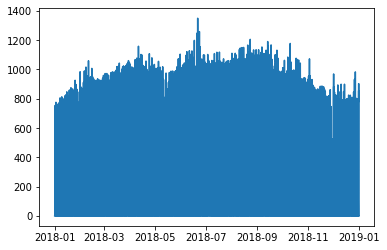

In [12]:
path_archivo='../../01_weather_data/03_imputing_process/01_test_data/'
nombre_archivo='tmx_incomplete_s15Nov_solar_angles.csv'

tmx_nocheang=cld.nightzero_timeprep(tmx_preANN,saved_file=nombre_archivo,save=True,saving_path=path_archivo)
# tmx_nocheang=nightzero_timeprep(tmx_preANN,path_archivo,nombre_archivo,nightzero=False)
plt.plot(tmx_nocheang.Ig)
tmx_nocheang

# Verifying that it worked 

In [13]:
tmxnocheang=pd.read_csv(path_archivo+nombre_archivo,index_col=0,parse_dates=True)

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

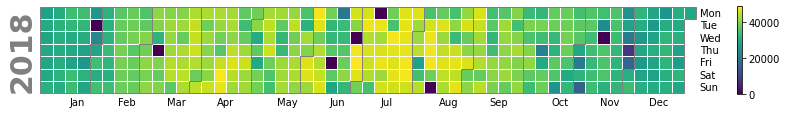

In [14]:
calplot.calplot(tmxnocheang.Ig)


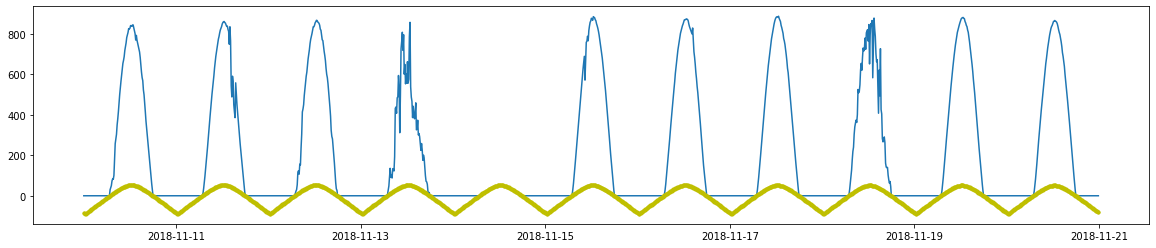

In [15]:
fig, ax=plt.subplots(figsize=(20,4))
ax.plot(tmxnocheang.Ig['2018-11-10':'2018-11-20'])
ax.plot(tmxnocheang.alturasolar['2018-11-10':'2018-11-20'],'y.')

In [16]:
print('data saved data on: \n '+path_archivo+nombre_archivo)

data saved data on: 
 ../../01_weather_data/03_imputing_process/01_test_data/tmx_incomplete_s15Nov_solar_angles.csv


In [17]:
tmxnocheang


,Ib,Ig,to,RH,P,WS,WD,alturasolar,azimuth
time,,,,,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,1.422,316.0,-79.806160,166.773196
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,1.008,283.7,-81.878940,170.053742
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,1.565,326.0,-83.764991,173.367191
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,2.175,354.5,-85.236372,176.703016
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,1.902,348.0,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,1.715,332.2,-68.725457,151.345160
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,1.703,320.5,-71.001501,154.338568
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,2.887,335.7,-73.264218,157.400817
